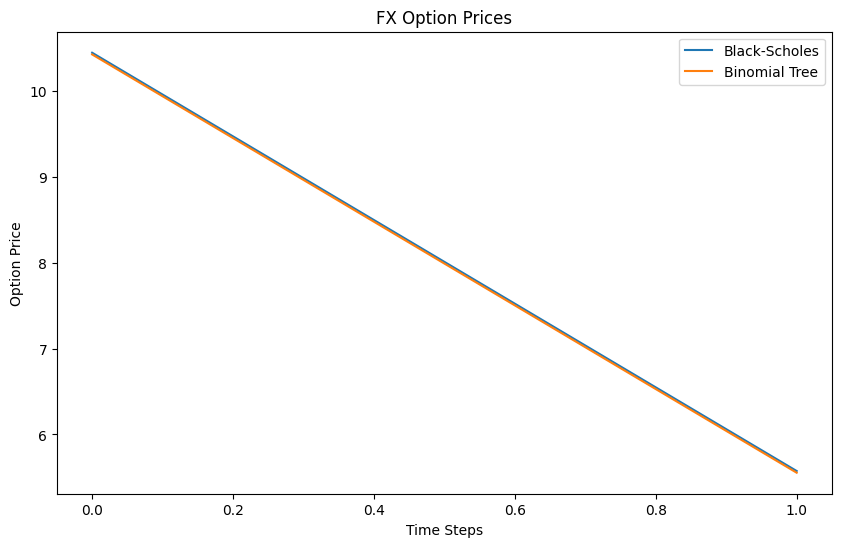

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def black_scholes(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call_price, put_price

def binomial_tree(S, K, r, sigma, T, n):
    delta_t = T / n
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)

    stock_price = np.zeros((n + 1, n + 1))
    option_price = np.zeros((n + 1, n + 1))

    stock_price[0, 0] = S

    for i in range(1, n + 1):
        stock_price[i, 0] = stock_price[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_price[i, j] = stock_price[i - 1, j - 1] * d

    for j in range(n + 1):
        option_price[n, j] = np.maximum(stock_price[n, j] - K, 0)

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_price[i, j] = np.exp(-r * delta_t) * (p * option_price[i + 1, j] + (1 - p) * option_price[i + 1, j + 1])

    call_price = option_price[0, 0]
    put_price = option_price[0, 0] - S + K * np.exp(-r * T)
    return call_price, put_price

def plot_option_prices(option_prices, model_names):
    plt.figure(figsize=(10, 6))
    for i, prices in enumerate(option_prices):
        plt.plot(prices, label=model_names[i])
    plt.xlabel('Time Steps')
    plt.ylabel('Option Price')
    plt.title('FX Option Prices')
    plt.legend()
    plt.show()

# Example usage
S = 100     # Spot price
K = 100     # Strike price
r = 0.05    # Risk-free interest rate
sigma = 0.2 # Volatility
T = 1       # Time to maturity
n = 100     # Number of time steps

call_bs, put_bs = black_scholes(S, K, r, sigma, T)
call_bt, put_bt = binomial_tree(S, K, r, sigma, T, n)

option_prices = [[call_bs, put_bs], [call_bt, put_bt]]
model_names = ['Black-Scholes', 'Binomial Tree']

plot_option_prices(option_prices, model_names)
